# <center> The GA/IDS Project <br>
## <center> (Genetic Algorithm/Intrusion Detection System)
### <center> Feature Selection
#### <center> Dataset N-BaIoT

In [1]:
# Importação de modulos Python
import os
import time
from datetime import datetime

import numpy as np
import pandas as pd
from random import randint

In [2]:
# Importação das bibiotecas do Sklearn
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import precision_score , recall_score, f1_score, confusion_matrix, log_loss

In [3]:
# Importação das bibliotecas Graficas
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

# Exibe gráficos na página (inline)
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
tecnica = 'GA'
dset_name = 'NBaIoT20Train'
df = pd.read_csv('../../../../../datasets/dacoga/nbaiot/train/dsetN-Baiot_v2_20_train.csv')
df.head()

,MI_dir_L0_1_weight,MI_dir_L0_1_mean,MI_dir_L0_1_variance,H_L0_1_weight,H_L0_1_mean,H_L0_1_variance,HH_L0_1_mean,HH_L0_1_std,HH_L0_1_magnitude,HH_L0_1_radius,...,HH_jit_L0_1_mean,HH_jit_L0_1_variance,HpHp_L0_1_weight,HpHp_L0_1_mean,HpHp_L0_1_std,HpHp_L0_1_magnitude,HpHp_L0_1_radius,HpHp_L0_1_covariance,HpHp_L0_1_pcc,label
0,3115.625242,334.618741,63520.590911,3115.625242,334.618741,63520.590911,60.000000,0.000000,60.000000,0.000000e+00,...,1.507658e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
1,6684.153422,69.439350,43.127894,6684.153422,69.439350,43.127894,60.000000,0.000000,60.000000,0.000000e+00,...,1.507657e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
2,3802.324281,341.306889,59809.003237,3802.324281,341.306889,59809.003237,553.854057,8.489666,553.854057,7.207442e+01,...,1.762503e-02,1.648258e+07,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,0
3,2011.407214,60.115786,2.018709,2011.407214,60.115786,2.018709,60.000000,0.000000,60.000000,0.000000e+00,...,1.507654e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
4,32.569167,123.590500,29646.295000,32.569167,123.590500,29646.295000,74.000000,0.000002,74.000000,2.730000e-12,...,1.060831e+01,1.729738e+04,1.933259,74.0,0.000001,74.0,1.820000e-12,0.0,0.0,1


In [6]:
# Start algorithms time
start_time = time.time()

Label
Ataques 0 1376909
Normal 1 359432

Ataques representam 79.2995% do dataset.



<Axes: xlabel='label', ylabel='count'>

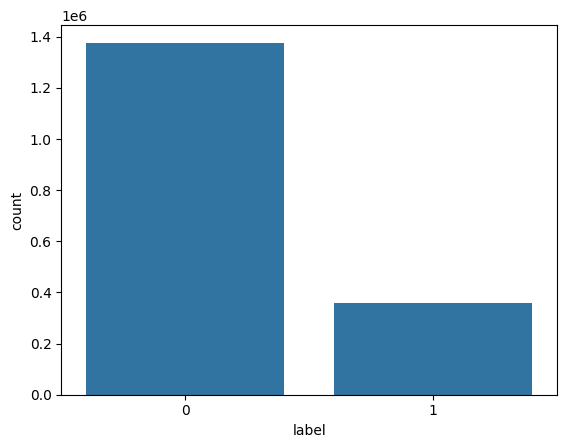

In [7]:
# Verificar o balanceamento das classes
#print(df.label.value_counts())
print('Label')
print('Ataques' , df.label.value_counts().index.tolist()[0], df.label.value_counts()[0])
print('Normal' , df.label.value_counts().index.tolist()[1], df.label.value_counts()[1])

print("\nAtaques representam {:.4f}% do dataset.\n".
      format((df[df.label == 0].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
sns.countplot(x=df['label'])

In [8]:
print('Return a tuple representing the dimensionality of the DataFrame')
print('Colunas', df.shape[1])
print('Linhas', df.shape[0])

Return a tuple representing the dimensionality of the DataFrame
Colunas 23
Linhas 1736341


In [9]:
xData = df.iloc[:, :-1].values
yData = df.iloc[:, -1].values
n_features = xData.shape[1]

In [10]:
print('Atributos do dataframe', n_features)

Atributos do dataframe 22


In [11]:
# Padronizando os dados
scaler = preprocessing.MinMaxScaler().fit_transform(xData)
#scaler = preprocessing.StandardScaler().fit_transform(xData)

In [12]:
X = scaler
y = yData

## Inicialização da População

In [13]:
'''
Pseudo-Código:
-------------
Função para inicializar uma população de cromossomos

1. Crie uma lista vazia para armazenar a população de cromossomos.
2. Para cada indivíduo na população:
    a. Crie um cromossomo com todos os genes inicialmente definidos como 1.
    b. Defina os primeiros 30% dos genes como 0.
    c. Embaralhe o cromossomo para distribuir aleatoriamente os genes 0s e 1s.
d. Adicione o cromossomo à lista de população.
3. Retorne a lista de população.
'''
def initilization_of_population2(n_population, n_features):
    # A linha abaixo é uma correção para garantir que os tipos de dados NumPy sejam usados corretamente
    np.int = np.int_

    # Lista vazia para armazenar todos os cromossomos (população)
    population = []
    
    # Loop para criar cada cromossomo
    for i in range(n_population):
        # Cria um cromossomo inicialmente preenchido com 1s.
        # A dimensão do cromossomo é determinada por n_features.
        chromosome = np.ones(n_features, dtype=np.int)
        
        # Define os primeiros 30% dos genes do cromossomo como 0.
        # Por exemplo, se n_features for 10, então os primeiros 3 genes serão definidos como 0.
        chromosome[:int(0.10*n_features)] = 0
        
        # Embaralha o cromossomo. Isso garante que os 0s e 1s sejam distribuídos aleatoriamente.
        np.random.shuffle(chromosome)
        
        # Adiciona o cromossomo à população
        population.append(chromosome)
    
    # Retorna a população de cromossomos
    return population

In [14]:
def initilization_of_population(n_population, n_features):
    # Inicializar uma matriz vazia para armazenar a população
    population = []

    # Loop para criar cada cromossomo
    for i in range(n_population):
        # Cria um cromossomo com valores binários aleatórios
        chromosome = np.random.randint(2, size=n_features)
        
        # Adicione o cromossomo à população
        population.append(chromosome)

    # Retorna a população de cromossomos
    return population

In [15]:
'''
    Pseudo-Código:
-------------
    Realiza a seleção de torneio para escolher os pais com base em sua adequação.
    
    Parâmetros:
    - population: A população atual de indivíduos.
    - fitness: Uma lista de valores de adequação para cada indivíduo na população.
    - num_parents: Número de pais a serem selecionados.

    Retorna:
    - Lista com os pais selecionados através da seleção de torneio.
    
    Pseudocódigo:
    1. Se o número de pais for ímpar, adicione mais um para torná-lo par.
    2. Inicialize uma lista vazia para os pais selecionados.
    3. Para cada pai a ser selecionado:
        a. Escolha aleatoriamente 3 indivíduos da população (sem reposição).
        b. Entre os 3 selecionados, escolha o de menor valor de aptidão (pois estamos supondo um problema de minimização).
        c. Adicione o indivíduo escolhido à lista de pais.
    4. Retorne a lista de pais.
'''
def tournament_selection(population, fitness, num_parents):

    # Garante um número par de pais
    if num_parents % 2 != 0:  
        num_parents += 1

    # Inicializando a lista para armazenar os pais selecionados.
    parents = []

    # Realiza o torneio para cada pai a ser selecionado.
    for _ in range(num_parents):
        # Seleciona aleatoriamente 3 índices da população.
        selected_indices = np.random.choice(range(len(population)), size=3, replace=False)
        
        # Encontra o índice do indivíduo com a melhor (menor) aptidão entre os selecionados.
        best_index = selected_indices[np.argmin(fitness[selected_indices])]

        # Adiciona o indivíduo vencedor à lista de pais.
        parents.append(population[best_index])

    # Retorna a lista de pais selecionados.
    return parents

In [16]:
'''
Pseudo-Código:
-------------
    Seleciona os pais para reprodução usando o método da roleta.
    1. Calcule a adequação total da população.
    2. Gere um número aleatório entre 0 e a adequação total.
    3. Passe pela população e some a adequação de cada indivíduo até atingir ou exceder o número aleatório.
    4. O indivíduo onde você parar é selecionado.
'''
def roulette_wheel_selection2(population, fitness, num_parents):

    if num_parents % 2 != 0:  # Garante um número par de pais
        num_parents += 1
    
    inverse_fitness = 1.0 / (1.0 + fitness)  # Transforma o problema de minimização em maximização
    total_fit = np.sum(inverse_fitness)
    probabilities = inverse_fitness / total_fit

    parents = []
    for _ in range(num_parents):
        r = np.random.rand()
        for idx, individual in enumerate(population):
            r -= probabilities[idx]
            if r <= 0:
                parents.append(individual)
                break

    return parents

In [17]:
'''
Pseudo-Código:
-------------
Seleciona os pais para reprodução usando o método da roleta.

1. Calcule a adequação total da população.
   - Soma todas as pontuações de aptidão dos indivíduos na população.

2. Gere um número aleatório entre 0 e a adequação total.
   - Use uma função aleatória para gerar um valor entre 0 e a soma da aptidão total.

3. Passe pela população e some a adequação de cada indivíduo até atingir ou exceder o número aleatório.
   - Inicie uma variável de soma com zero.
   - Para cada indivíduo na população:
     - Adicione a pontuação de aptidão do indivíduo à variável de soma.
     - Verifique se a variável de soma atingiu ou excedeu o valor aleatório gerado.
     - Se sim, o indivíduo atual é selecionado.

4. O indivíduo onde você parar é selecionado.
   - O indivíduo cuja pontuação de aptidão causou a variável de soma a atingir ou exceder o valor aleatório é escolhido como um dos pais.
'''

def roulette_wheel_selection(population, fitness, num_parents):
    # Garante um número par de pais
    if num_parents % 2 != 0:
        num_parents += 1

    # Calcula a aptidão inversa para transformar o problema de minimização em maximização
    inverse_fitness = 1.0 / (1.0 + fitness)

    # Calcula as probabilidades de seleção com base na aptidão inversa
    probabilities = inverse_fitness / np.sum(inverse_fitness)

    # Lista para armazenar os pais selecionados
    parents = []

    # Calcula as probabilidades cumulativas para a seleção eficiente
    cumulative_probabilities = np.cumsum(probabilities)

    # Gera todos os valores aleatórios de uma vez
    random_values = np.random.rand(num_parents)

    # Loop para selecionar os pais com base nas probabilidades
    for r in random_values:
        # Encontra o índice no vetor cumulative_probabilities onde r se encaixa
        index = np.searchsorted(cumulative_probabilities, r)
        
        # Adiciona o indivíduo correspondente ao índice à lista de pais
        parents.append(population[index])

    return parents

In [18]:
'''
Pseudo-Código:
-------------
1. Inicialize uma lista vazia para os descendentes (offspring).
2. Itere sobre os pais de dois em dois:
   a. Selecione dois pais consecutivos.
   b. Selecione um ponto de cruzamento aleatoriamente.
   c. Crie dois novos descendentes (child1 e child2):
      i. child1: primeira parte do parent1 + segunda parte do parent2.
      ii. child2: primeira parte do parent2 + segunda parte do parent1.
   d. Adicione os dois descendentes à lista de descendentes.
3. Retorne a lista de descendentes.
'''

def crossover(parents):
    # Inicialização da lista de descendentes
    offspring = []

    # Iterando sobre os pais de dois em dois
    for i in range(0, len(parents), 2):
        # Seleção dos pais consecutivos
        parent1 = parents[i]
        parent2 = parents[i+1]

        # Seleção aleatória do ponto de cruzamento
        crossover_point = np.random.randint(0, n_features)

        # Criação dos descendentes usando o ponto de cruzamento
        child1 = np.hstack([parent1[:crossover_point], parent2[crossover_point:]])
        child2 = np.hstack([parent2[:crossover_point], parent1[crossover_point:]])

        # Adicionando os descendentes à lista
        offspring.extend([child1, child2])

    # Retornando a lista completa de descendentes
    return offspring

In [19]:
'''
Pseudo-código:
1. Para cada indivíduo do cruzamento (cada linha do array cruzamento):
   a. Determine se cada característica (feature) deve sofrer mutação baseado na mutation_rate.
      (por exemplo, com uma mutation_rate de 0.05, há uma chance de 5% de cada característica ser mutada)
   b. Se a característica for mutada, mude seu valor (de 0 para 1 ou de 1 para 0).

2. Retorne os indivíduos mutados.
'''

def mutacao(cruzamento, mutation_rate, n_features):
    # Gerar uma matriz de mutações. Se mutation[i][j] é 1, a j-ésima característica do i-ésimo indivíduo será mutada.
    # Se for 0, ela não será. A probabilidade de ser 1 é dada por mutation_rate.
    mutation = np.random.choice([0, 1], size=(len(cruzamento), int(n_features)),
                                p=[1-mutation_rate, mutation_rate])
    
    # Aplica a mutação nos indivíduos. Se mutation[i][j] é 1, a j-ésima característica do i-ésimo indivíduo
    # muda de valor (usando XOR lógico). Se for 0, ela permanece a mesma.
    offspring = np.logical_xor(cruzamento, mutation).astype(int)
    
    # Retorne os indivíduos após a mutação.
    return offspring

## Função de Aptidão

In [20]:
# Função modificada para processar um único vetor de características
def aptidao_individual(features):
    global clf
    # Inicializa listas para armazenar métricas
    accGa, precisionGa, recallGa, f1scoreGa, crocGa, loglossGa, cmGa = [], [], [], [], [], [], []

    features = np.array(features, dtype=bool)
    if np.sum(features) == 0:
        return 1, 0, 0, 0, 0, []  # Retorna valores padrão se nenhuma característica for selecionada

    X_selected = X[:, features]
    skf = StratifiedKFold(n_splits=5)
    clf = LinearDiscriminantAnalysis()

    for train_index, test_index in skf.split(X_selected, y):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'roc_auc': roc_auc_score(y_test, y_pred, multi_class='ovr'),
        'cm': confusion_matrix(y_test, y_pred)
    }
    
# Função para processar a matriz de população em paralelo
def aptidao(matriz_populacao):
    resultados = Parallel(n_jobs=-1)(delayed(aptidao_individual)(features) for features in matriz_populacao)
    # Desempacota os resultados usando as chaves do dicionário
    fitness = np.array([res['accuracy'] for res in resultados])
    precisionGa = np.mean([res['precision'] for res in resultados])
    recallGa = np.mean([res['recall'] for res in resultados])
    f1scoreGa = np.mean([res['f1'] for res in resultados])
    crocGa = np.mean([res['roc_auc'] for res in resultados])
    cmGa = [res['cm'] for res in resultados]
    
    return fitness, precisionGa, recallGa, f1scoreGa, crocGa, cmGa

In [21]:
'''
Pseudo-Código:

função genetic_algorithm(X, y, n_population, n_generations, mutation_rate, crossover_rate, selection_method)
    inicalizar população
    para cada geração em n_generações:
        calcular a aptidão da população atual
        identificar o melhor indivíduo da geração
        mostrar progresso
        seleciona pais com base em um método de seleção (torneio ou roleta)
        realizar cruzamento entre os pais para produzir descendentes
        realizar mutação nos descendentes
        atualizar a população combinando pais e descendentes
        armazenar informações sobre a geração atual (número de características selecionadas, precisão)
        mostrar o melhor score da função de aptidão da geração
    returnar o melhor indivíduo, número de características selecionadas em cada geração e as melhores precisões

    
# Inicialização das variáveis
# Inicialização da população
# Loop para cada geração
    para cada geração de 1 até n_generations:
        # Cálculo da aptidão da população atual        
        # Identificar o melhor indivíduo da geração        
        # Armazenar informações sobre a geração atual        
        # Mostrar informações sobre a geração atual (opcional)        
        # Seleção de pais com base no método fornecido (torneio, roleta, etc.)        
        # Realizar cruzamento entre os pais para produzir descendentes        
        # Realizar mutação nos descendentes        
        # Atualizar a população combinando pais e descendentes    
# Retornar o melhor resultado encontrado

'''

def genetic_algorithm(X, y, n_population, n_generations, mutation_rate, crossover_rate, selection_method):
    # Inicialização de variáveis globais
    global fitness, best_index, iteration_duration, num_features_selected, best_accuracies, iteracao                        
    
    # Listas para armazenar o número de características selecionadas e as melhores precisões
    num_features_selected = []
    best_fitness = []
    melhores_atributos = []
    melhorFSAccuracy = []
    melhorPrecision = [] 
    melhorRecall = []
    melhorF1score = []
    melhorCurvaroc = []
    melhorlearnMeasure = [0]
    melhorCMatrix = []

    
    # Start algorithms time
    start_time = time.time()
                          
    # Para armazenar os tempos de cada iteração
    iteration_times = []
    melhor_acuracia_global = [0]

    iteracao = []
    
    # Inicialização da população
    populacao = initilization_of_population(n_population, n_features)

    todas_matrizes_confusao = []
    
    # Loop para cada geração
    for geracao in range(n_generations):
       
        # Calcula a aptidão da população atual
        #fitness = np.apply_along_axis(aptidao, 1, populacao)
        fitness, precision, recall, f1score, croc, cm = aptidao(populacao)
        #fitness, prec = aptidao(populacao)

        todas_matrizes_confusao.append(cm)
        
        # Identifica o melhor indivíduo da geração
        best_index = np.argmax(fitness)
        best_features_this_gen = populacao[best_index]
        selected_indices = [index for index, val in enumerate(best_features_this_gen) if val == 1]
                
        # Seleção dos pais
        num_parents_needed = int(n_population * crossover_rate)
        # Seleção com base no método fornecido: torneio ou roleta
        if selection_method == "tournament":
            parents = tournament_selection(populacao, fitness, num_parents_needed)
        elif selection_method == "roulette":
            parents = roulette_wheel_selection(populacao, fitness, num_parents_needed)
        else:
            raise ValueError("Unknown selection method")

        # Cruzamento entre os pais selecionados
        cruzamento = crossover(parents)
        
        # Mutação nos descendentes
        offspring = mutacao(cruzamento, mutation_rate, n_features)

        if fitness[best_index] > melhor_acuracia_global:
        #if fitness[best_index] > melhorlearnMeasure[-1]:
            melhor_acuracia_global = fitness[best_index]
            # Armazenar informações sobre a geração atual
            melhorlearnMeasure.append(fitness[best_index])
            best_features_this_gen = populacao[best_index]
            num_features_selected.append(np.sum(best_features_this_gen))
            best_fitness.append(1 - fitness[best_index])
            melhores_atributos.append(selected_indices)
            melhorFSAccuracy.append(fitness[best_index])
            melhorPrecision.append(precision)
            melhorRecall.append(recall)
            melhorF1score.append(f1score)
            melhorCurvaroc.append(croc)
            melhorCMatrix.append(cm[best_index])
            
            # Mostra o melhor score da função de aptidão da geração          
            print('Melhor Acurácia = ', round(fitness[best_index], 4))
            print('Melhor Precision = ', round(precision, 4))
            print('Melhor Recall = ', round(recall, 4))
            print('Melhor F1 Score = ', round(f1score, 4))
            print('Melhor Curva Roc = ', round(croc, 4))
            print('Melhor Score da Função Fitness = ', round(1 - fitness[best_index], 4))
            print('Número Caracteristicas Selecionada', len(selected_indices))
            print('Características Selecionadas', selected_indices)
            print('Matriz de Confusão')
            print(cm[best_index])
        
            #Atualiza a população combinando pais e descendentes
            new_population_size = min(n_population, len(parents) + len(offspring))
            combined = np.vstack([parents, offspring])
            populacao[:new_population_size] = combined[:new_population_size]
            iteracao.append(geracao+1)

        # Calcula e imprime a duração da iteração
        end_time = time.time()
        iteration_duration = end_time - start_time  # Calcula a duração da iteração
        iteration_times.append(iteration_duration)  # Adiciona à lista
        print(f"Tempo da iteração {geracao + 1}: {iteration_duration:.4f} segundos")
        agora = datetime.now()
        data_hora_str = agora.strftime("%d-%m-%Y %H:%M:%S")
        print('Data & Hora:', data_hora_str)

        print('------ Fim da Geracao = ',geracao + 1,'-------') 
    
    # Retorna o melhor indivíduo, número de características selecionadas em cada geração e as melhores precisões
    return iteracao, best_fitness, melhorFSAccuracy, melhorPrecision, melhorRecall, melhorF1score, melhorCurvaroc, num_features_selected, melhores_atributos, iteration_duration

In [22]:
timestamp = str(datetime.now().replace(second=0, microsecond=0))
timestamp = timestamp.replace(' ','_')
timestamp = timestamp.replace('-','_')
timestamp = timestamp.replace(':','_')
outputFile = './output/'+ dset_name + '_' + tecnica + '_' + timestamp +'.csv'

def output():
    dict = {
        'num_iteracoes':iteracao, 'best_fitness':best_fitness, 'melhor_acuraria':melhorFSAccuracy, 'melhor_precision':melhorPrecision,
        'melhor_recall':melhorRecall, 'melhor_f1score':melhorF1score, 'melhor_curva_roc':melhorCurvaroc,
        'num_atributos':num_features_selected, 'melhores_atributos':melhores_atributos, 'tempo_ineracao':iteration_duration
    }
    outputdf = pd.DataFrame(dict)
    outputdf.to_csv(outputFile, index=None)

In [23]:
#Parametros da aplicação
#n_population = n_features
n_population = 50
n_generations = 50
mutation_rate = 0.05
crossover_rate = 0.5

In [24]:
# Execute o algoritmo genético e retorna o melhor conjunto de características
# selection_method="tournament" or "roulette"
iteracao, best_fitness, melhorFSAccuracy, melhorPrecision, melhorRecall, melhorF1score, melhorCurvaroc, num_features_selected, melhores_atributos, iteration_duration = genetic_algorithm(X, y, n_population, n_generations, mutation_rate, crossover_rate, selection_method="roulette")
output()

Melhor Acurácia =  0.9926
Melhor Precision =  0.9315
Melhor Recall =  0.9174
Melhor F1 Score =  0.9086
Melhor Curva Roc =  0.9174
Melhor Score da Função Fitness =  0.0074
Número Caracteristicas Selecionada 12
Características Selecionadas [2, 3, 5, 6, 13, 14, 15, 16, 17, 18, 19, 20]
Matriz de Confusão
[[273145   2236]
 [   322  71565]]
Tempo da iteração 1: 144.0371 segundos
Data & Hora: 21-02-2024 11:31:18
------ Fim da Geracao =  1 -------
Tempo da iteração 2: 283.7833 segundos
Data & Hora: 21-02-2024 11:33:38
------ Fim da Geracao =  2 -------
Tempo da iteração 3: 423.4209 segundos
Data & Hora: 21-02-2024 11:35:58
------ Fim da Geracao =  3 -------
Tempo da iteração 4: 563.0448 segundos
Data & Hora: 21-02-2024 11:38:17
------ Fim da Geracao =  4 -------
Tempo da iteração 5: 702.2525 segundos
Data & Hora: 21-02-2024 11:40:36
------ Fim da Geracao =  5 -------
Tempo da iteração 6: 841.5473 segundos
Data & Hora: 21-02-2024 11:42:56
------ Fim da Geracao =  6 -------
Tempo da iteração 7: 

In [25]:
# Contabiliza o tempo de execução do algoritmo
tempo_total = (time.time() - start_time)
print(f'--- Tempo de execução: {tempo_total:.2f} segundos ---')

--- Tempo de execução: 6978.11 segundos ---


In [26]:
result = pd.read_csv(outputFile)#, skiprows=[1])
result

,num_iteracoes,best_fitness,melhor_acuraria,melhor_precision,melhor_recall,melhor_f1score,melhor_curva_roc,num_atributos,melhores_atributos,tempo_ineracao
0,1,0.007366,0.992634,0.931468,0.917427,0.908635,0.917427,12,"[2, 3, 5, 6, 13, 14, 15, 16, 17, 18, 19, 20]",6975.045217


In [27]:
outputFile

'./output/NBaIoT20Train_GA_2024_02_21_11_28_00.csv'

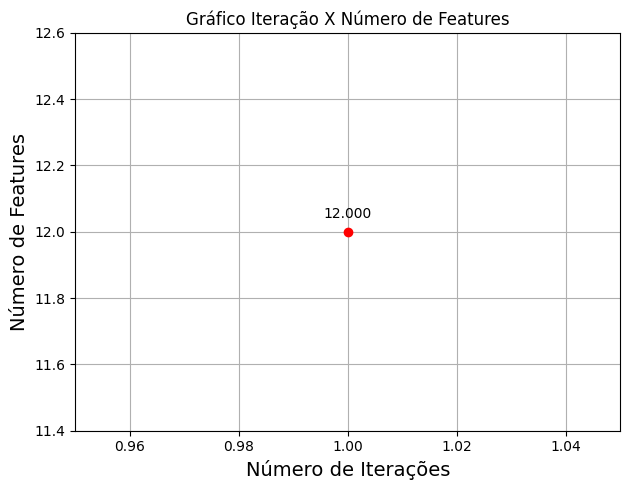

In [28]:
# Plotando os gráficos
plt.figure(figsize=(12, 5))
# Iteração vs. Número de Características Selecionadas
plt.subplot(1, 2, 1)
plt.plot(range(1, len(result['num_iteracoes']) + 1), num_features_selected, marker='o', linestyle='--', color='red')
plt.title('Gráfico Iteração X Número de Features')
plt.xlabel("Número de Iterações", fontsize=14)
plt.ylabel("Número de Features", fontsize=14)

# Defina os limites dos eixos x e y com margens
x_min = min(result['num_iteracoes'])
x_max = max(result['num_iteracoes'])
y_min = min(result['num_atributos'])
y_max = max(result['num_atributos'])

x_margin = (x_max - x_min) * 0.1 # Ajuste a margem conforme necessário
y_margin = (y_max - y_min) * 0.1 # Ajuste a margem conforme necessário

plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)

plt.grid(visible=True)

plt.tight_layout()
# Adicionar valores nas bolinhas com três casas decimais
for i in range(len(result['num_iteracoes'])):
    x = result['num_iteracoes'][i]
    y = result['num_atributos'][i]
    plt.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

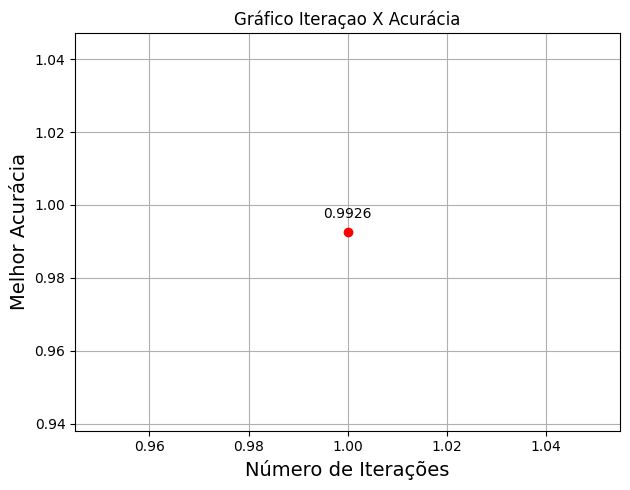

In [29]:
# Plotando os gráficos
plt.figure(figsize=(12, 5))
# Iteração vs. Melhor Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(1, len(result['num_iteracoes']) + 1), melhorFSAccuracy, marker='o', linestyle='--', color='red')
plt.title('Gráfico Iteraçao X Acurácia')
plt.xlabel("Número de Iterações",fontsize=14)
plt.ylabel("Melhor Acurácia",fontsize=14)

# Defina os limites dos eixos x e y com margens
x_min = min(result['num_iteracoes'])
x_max = max(result['num_iteracoes'])
y_min = min(result['melhor_acuraria'])
y_max = max(result['melhor_acuraria'])

#x_margin = (x_max - x_min) * 0.1  # Ajuste a margem conforme necessário
#y_margin = (y_max - y_min) * 0.1  # Ajuste a margem conforme necessário

#plt.xlim(x_min - x_margin, x_max + x_margin)
#plt.ylim(y_min - y_margin, y_max + y_margin)

plt.grid(visible=True)

# Adicionar valores nas bolinhas com três casas decimais
for i in range(len(result['num_iteracoes'])):
    x = result['num_iteracoes'][i]
    y = result['melhor_acuraria'][i]
    plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

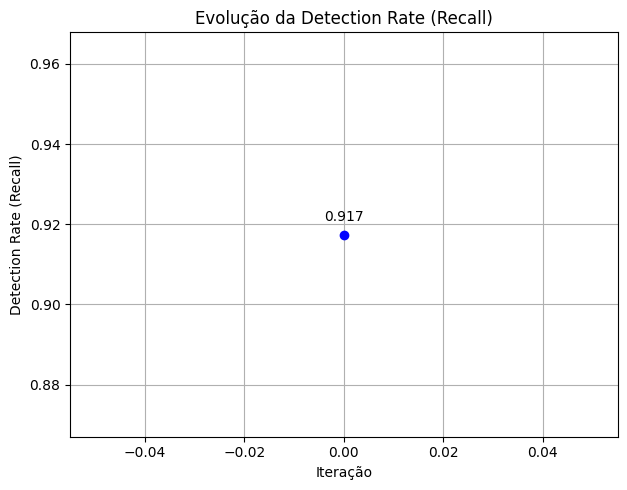

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(melhorRecall, marker='o', linestyle='-', color='b')
plt.title('Evolução da Detection Rate (Recall)')
plt.xlabel('Iteração')
plt.ylabel('Detection Rate (Recall)')

# Defina os limites dos eixos x e y com margens
#x_min = min(result['num_iteracoes'])
#x_max = max(result['num_iteracoes'])
#y_min = min(result['melhor_acuraria'])
#y_max = max(result['melhor_acuraria'])

#x_margin = (x_max - x_min) * 0.1  # Ajuste a margem conforme necessário
#y_margin = (y_max - y_min) * 0.1  # Ajuste a margem conforme necessário

#plt.xlim(x_min - x_margin, x_max + x_margin)
#plt.ylim(y_min - y_margin, y_max + y_margin)

plt.grid(visible=True)

# Adicionar valores nas bolinhas com três casas decimais
for i, recall in enumerate(melhorRecall):
    plt.annotate(f'{recall:.3f}', (i, recall), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

In [31]:
acuraria_media = result['melhor_acuraria'].mean()
melhor_acuraria = result['melhor_acuraria'].max()
melhor_precision = result['melhor_precision'].max()
melhor_recall = result['melhor_recall'].max()
melhor_f1score =  result['melhor_f1score'].max()
melhor_curva_roc =  result['melhor_curva_roc'].max()

In [32]:
melhores_atributos = result.loc[result['melhor_acuraria'] == melhor_acuraria, 'melhores_atributos']
lista = melhores_atributos.to_numpy()
lst_num = eval(lista[0])
arr_num = np.array(lst_num)
X = df.iloc[:, arr_num]
#X

In [33]:
y = df.iloc[:, -1].values
y = pd.DataFrame(y, columns=['label'])
df_selected = pd.concat([X, y], axis=1)
df_selected.head()

,MI_dir_L0_1_variance,H_L0_1_weight,H_L0_1_variance,HH_L0_1_mean,HH_jit_L0_1_mean,HH_jit_L0_1_variance,HpHp_L0_1_weight,HpHp_L0_1_mean,HpHp_L0_1_std,HpHp_L0_1_magnitude,HpHp_L0_1_radius,HpHp_L0_1_covariance,label
0,63520.590911,3115.625242,63520.590911,60.000000,1.507658e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0
1,43.127894,6684.153422,43.127894,60.000000,1.507657e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0
2,59809.003237,3802.324281,59809.003237,553.854057,1.762503e-02,1.648258e+07,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0
3,2.018709,2011.407214,2.018709,60.000000,1.507654e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0
4,29646.295000,32.569167,29646.295000,74.000000,1.060831e+01,1.729738e+04,1.933259,74.0,0.000001,74.0,1.820000e-12,0.0,1


In [34]:
print ('Quantidade de Iterações: ', len(result['num_iteracoes']))
print ('Quantidade de Features Originais :', n_features)
print ('Quantidade de Features Selecionadas com GA:', X.shape[1])
print (f'Melhor Acuracia: {melhor_acuraria:_.4f}')
print (f'Melhor Media: {acuraria_media:_.4f}')
print (f'Melhor Precision: {melhor_precision:_.4f}')
print (f'Melhor Recall: {melhor_recall:_.4f}')
print (f'Melhor F1 Score: {melhor_f1score:_.4f}')
print (f'Melhor Curva Roc: {melhor_curva_roc:_.4f}')
print (f'Tempo de execução: {tempo_total:.2f} segundos')

Quantidade de Iterações:  1
Quantidade de Features Originais : 22
Quantidade de Features Selecionadas com GA: 12
Melhor Acuracia: 0.9926
Melhor Media: 0.9926
Melhor Precision: 0.9315
Melhor Recall: 0.9174
Melhor F1 Score: 0.9086
Melhor Curva Roc: 0.9174
Tempo de execução: 6978.11 segundos


In [35]:
# Plotar a matrix de confusão
#print('Matrix de confusão\n', confusion_matrix(y_test, y_pred))
#print()

# Imprimir relatório de classificação
#print('Relatório de Classificação:\n', classification_report(y_true=y_test, y_pred=y_pred, digits=4))
#print()

# plotar a matrix de confusão
#ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, cmap=plt.cm.Blues, xticks_rotation='horizontal', 
#                                                display_labels = ['Ataque', 'Normal'], normalize='true')

#plt.show()
#print()

# plotar a curva ROC
#skplt.metrics.plot_roc(y_test, y_probas)
#plt.show()
#print()

### Salvando o Melhor SubDataset

In [37]:
timestamp = str(datetime.now().replace(second=0, microsecond=0))
timestamp = timestamp.replace(' ','_')
timestamp = timestamp.replace('-','_')
timestamp = timestamp.replace(':','_')

outputDataFrame = '../../../../../datasets/dacoga/nbaiot/bestsub/' + dset_name + '_' + tecnica + '_' + timestamp + '_' +'selected' + '.csv'
df_selected.to_csv(outputDataFrame, index=None)